Forma dos dados escalados: (7561, 6)
Matriz de Correlação entre os Componentes de Tendência e Denoizados:
                           ws100_wavelet  humid_wavelet_trend  \
ws100_wavelet                   1.000000            -0.577436   
humid_wavelet_trend            -0.577436             1.000000   
wdisp100_wavelet_trend          0.744647            -0.776907   
temp_wavelet_trend              0.283886            -0.406657   
vertdisp100_wavelet_trend       0.718259            -0.755211   
wdir100_wavelet_trend           0.505640            -0.530447   

                           wdisp100_wavelet_trend  temp_wavelet_trend  \
ws100_wavelet                            0.744647            0.283886   
humid_wavelet_trend                     -0.776907           -0.406657   
wdisp100_wavelet_trend                   1.000000            0.350885   
temp_wavelet_trend                       0.350885            1.000000   
vertdisp100_wavelet_trend                0.969458            0.380357   


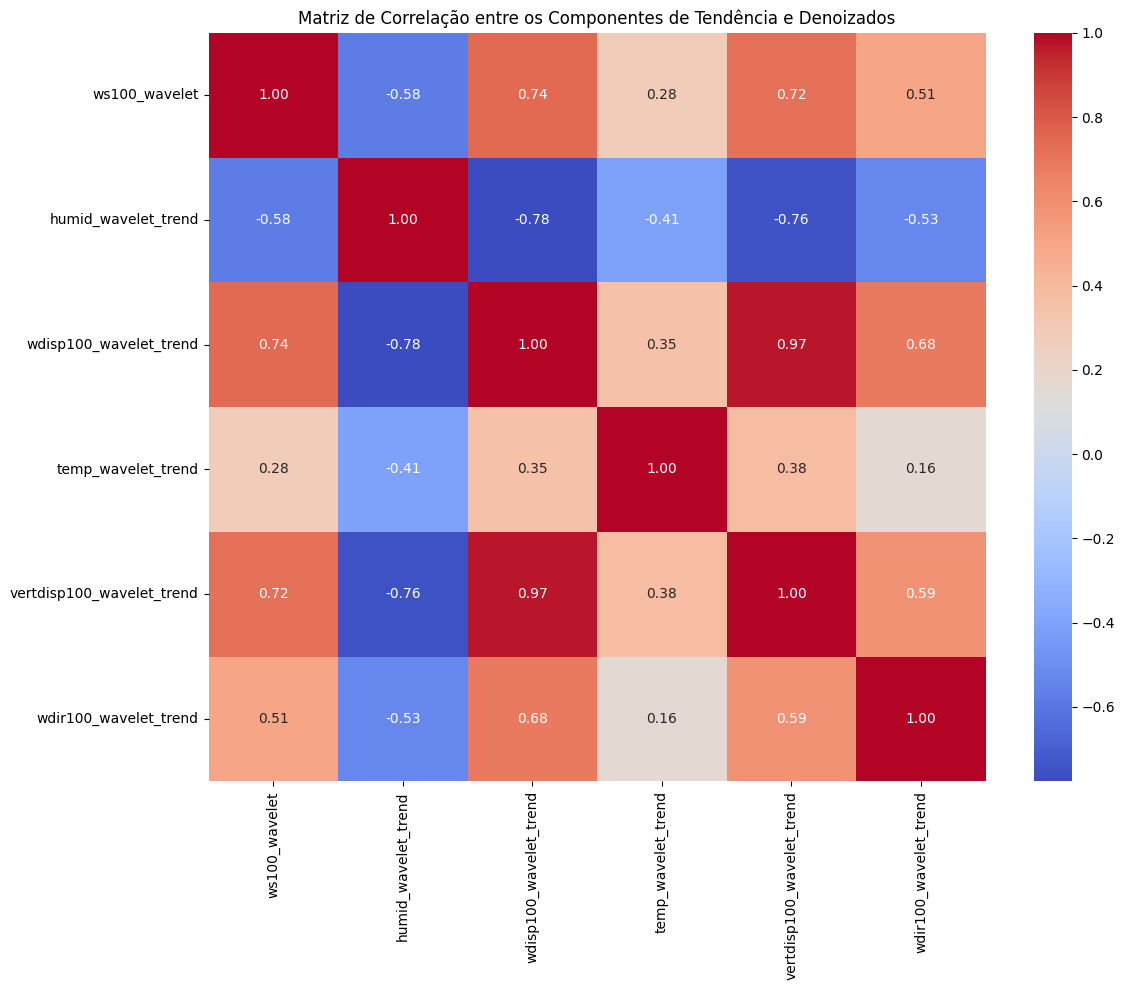

Forma de X_encoder: (7406, 144, 6)
Forma de X_decoder: (7406, 12, 1)
Forma de y_decoder: (7406, 12, 1)
Treino X_encoder: (5554, 144, 6), Treino X_decoder: (5554, 12, 1), Treino y_decoder: (5554, 12, 1)
Validação X_encoder: (1481, 144, 6), Validação X_decoder: (1481, 12, 1), Validação y_decoder: (1481, 12, 1)
Valor calculado de delta (90th percentile): 0.18870307341824766


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, 144, 6)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_enco… │ [(None, 144,      │     79,104 │ encoder_inputs[0… │
│ (Bidirectional)     │ 192), (None, 96), │            │                   │
│                     │ (None, 96),       │            │                   │
│                     │ (None, 96),       │            │                   │
│                     │ (None, 96)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, 12, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 192)       │          0 │ bidirectional_en… │
│ (Concatenate)       │                   │            │ bidirectional_en… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 192)       │          0 │ bidirectional_en… │
│ (Concatenate)       │                   │            │ bidirectional_en… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 12, 192), │    148,992 │ decoder_inputs[0… │
│                     │ (None, 192),      │            │ concatenate_9[0]… │
│                     │ (None, 192)]      │            │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 12, 192)   │          0 │ decoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 144, 192)  │          0 │ bidirectional_en… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 12, 192)   │          0 │ dropout_7[0][0],  │
│ (Attention)         │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 12, 384)   │          0 │ dropout_7[0][0],  │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 12, 1)     │        385 │ concatenate_11[0… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 228,481 (892.50 KB)

 Trainable params: 228,481 (892.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['encoder_inputs', 'decoder_inputs']. Received: the structure of inputs=('*', '*')
  warnings.warn(


174/174 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 0.0324 - mae: 0.2443 - mse: 0.1188 - val_loss: 0.0039 - val_mae: 0.0683 - val_mse: 0.0078 - learning_rate: 1.0000e-04
Epoch 2/200
 57/174 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0042 - mae: 0.0711 - mse: 0.0087

KeyboardInterrupt: 

In [4]:
# %% [markdown]
# #### Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dropout, Dense, Concatenate, TimeDistributed, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

# %% [markdown]
# #### Carrega o dataset

# %%
data = pd.read_csv("dataset.csv")

# Converte a coluna 'id' para string e extrai a parte antes do ponto
data['id_str'] = data['id'].astype(str).apply(lambda x: x.split('.')[0]) 
data['id_datetime'] = pd.to_datetime(data['id_str'], errors='coerce') 

# Define 'id_datetime' como índice do dataframe
data.set_index('id_datetime', inplace=True)
data.drop(columns=['id_str'], inplace=True)

# Cria um novo dataframe 'variables' com o mesmo índice de 'data'
variables = pd.DataFrame(index=data.index)

# %% [markdown]
# #### Transformada de wavelet

# %%
def wavelet_denoising(signal, wavelet='bior2.2', level=3):
    """
    Realiza a denoising de um sinal utilizando transformada wavelet.
    
    :param signal: Sinal a ser denoizado.
    :param wavelet: Tipo de wavelet a ser utilizada.
    :param level: Nível de decomposição.
    :return: Sinal denoizado.
    """
    # Decompõe o sinal utilizando a wavelet especificada
    coeffs = pywt.wavedec(signal, wavelet, mode='periodization', level=level)
    
    # Estima o ruído
    sigma = np.median(np.abs(coeffs[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    
    # Aplica thresholding suave nos coeficientes de detalhe
    coeffs[1:] = [pywt.threshold(i, value=uthresh, mode='hard') for i in coeffs[1:]]
    
    # Reconstrói o sinal a partir dos coeficientes denoizados
    reconstructed_signal = pywt.waverec(coeffs, wavelet, mode='periodization')
    
    # Retorna o sinal denoizado com o mesmo comprimento do original
    return reconstructed_signal[:len(signal)]

# %% [markdown]
# #### Filtragem, Decomposição e Escolha de Dado para o Modelo

# %%
# Lista das colunas que serão denoizadas
columns_to_denoise = ['ws100', 'humid', 'wdisp100', 'temp', 'vertdisp100', 'wdir100']

# Aplica a denoising wavelet em cada coluna especificada
for col in columns_to_denoise:
    if col in data.columns:
        denoised_signal = wavelet_denoising(data[col].values)
        variables[f'{col}_wavelet'] = denoised_signal  
    else:
        raise ValueError(f"A coluna '{col}' não existe no dataset.")

# %% [markdown]
# #### Decomposição Sazonal para Extrair Tendência

# %%
variables_decomposed = pd.DataFrame(index=variables.index)

# Lista das colunas denoizadas para decomposição
columns_denoised = [f'{col}_wavelet' for col in columns_to_denoise if 'ws100' not in col]

# Realiza a decomposição sazonal e extrai a tendência para cada coluna denoizada
for col in columns_denoised:
    if col in variables.columns:
        series = variables[col].dropna()
        
        if len(series) < 2 * 144:
            raise ValueError(f"A série {col} não tem dados suficientes para decomposição.")
        
        period = 144  # Definido conforme exemplo
        
        decomposition = seasonal_decompose(series, model='additive', period=period, extrapolate_trend='freq')
        
        trend = decomposition.trend
        variables_decomposed[f'{col}_trend'] = trend
    else:
        raise ValueError(f"A coluna {col} não existe no dataframe 'variables'.")

# Combina os componentes de tendência com as variáveis originais
variables = pd.concat([variables, variables_decomposed], axis=1)

# Remove linhas com NaN resultantes da decomposição
variables.dropna(inplace=True)

# %% [markdown]
# #### Escalagem dos Dados
variables.drop(columns=['humid_wavelet', 'wdisp100_wavelet', 'temp_wavelet', 'vertdisp100_wavelet', 'wdir100_wavelet'], inplace=True)

# %%
# Inicializa escaladores MinMax para normalizar os dados
scaler_ws100 = MinMaxScaler()
scaler_other = MinMaxScaler()

# Cria uma cópia dos dados denoizados e das tendências para escalonamento
variables_scaled = variables.copy()

# Lista das colunas a serem escalonadas
ws100_columns = ['ws100_wavelet']
trend_columns = [f'{col}_trend' for col in columns_denoised]  # Correção aqui

# Aplica o escalonamento nas colunas 'ws100_wavelet'
variables_scaled[ws100_columns] = scaler_ws100.fit_transform(variables[ws100_columns])

# Aplica o escalonamento nas colunas de tendência
variables_scaled[trend_columns] = scaler_other.fit_transform(variables[trend_columns])

# Aplica o escalonamento nas demais colunas denoizadas

print(f"Forma dos dados escalados: {variables_scaled.shape}")

# %% [markdown]
# #### Matriz de Correlação

# %%
# Plotar correlação entre os componentes
correlation_matrix = variables_scaled.corr()

print("Matriz de Correlação entre os Componentes de Tendência e Denoizados:")
print(correlation_matrix)

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre os Componentes de Tendência e Denoizados')
plt.tight_layout()
plt.show()

# %% [markdown]
# #### Prepara o Dado para as Camadas de Encode/Decode do Modelo

# %%
# Define o número de passos de entrada e saída para as sequências
input_steps = 144  # 24 horas
output_steps = 12  # 4 horas

def create_sequences(data, input_steps, output_steps, target_col_index):
    """
    Cria sequências de entrada e saída para o modelo Seq2Seq usando Teacher forcing.
    
    :param data: Dados escalonados.
    :param input_steps: Número de passos de entrada.
    :param output_steps: Número de passos de saída.
    :param target_col_index: Índice da coluna alvo.
    :return: Arrays de sequências para encoder, decoder e os alvos.
    """
    X_encoder = []
    X_decoder = []
    y_decoder = []
    
    # Itera sobre os dados para criar as sequências
    for i in range(len(data) - input_steps - output_steps + 1):
        
        # Sequência de entrada para o encoder
        X_encoder.append(data[i:(i + input_steps)])
        
        # Inicializa a entrada do decoder com zeros
        decoder_input = np.zeros((output_steps, 1))
        
        # Define o primeiro passo do decoder como o último valor do encoder
        decoder_input[0] = data[i + input_steps - 1, target_col_index]
        
        # Define os passos subsequentes do decoder com os valores reais
        decoder_input[1:] = data[i + input_steps:i + input_steps + output_steps - 1, target_col_index].reshape(-1, 1)
        
        X_decoder.append(decoder_input)
        
        # Define os alvos do decoder
        y_decoder.append(data[i + input_steps:i + input_steps + output_steps, target_col_index].reshape(-1, 1))
    
    return np.array(X_encoder), np.array(X_decoder), np.array(y_decoder)

# Converte os dados escalonados para um array NumPy
data_array = variables_scaled.values

# Obtém o índice da coluna alvo ('ws100_wavelet')
target_col_index = variables_scaled.columns.get_loc('ws100_wavelet')

# Cria as sequências para o modelo
X_encoder, X_decoder, y_decoder = create_sequences(data_array, input_steps, output_steps, target_col_index)

# %% [markdown]
# #### Divide os Dados de Treinamento, Validação e Teste

# %%
# Exibe as formas das sequências criadas
print(f"Forma de X_encoder: {X_encoder.shape}")
print(f"Forma de X_decoder: {X_decoder.shape}")
print(f"Forma de y_decoder: {y_decoder.shape}")

# Define os índices para divisão dos dados em treino, validação e teste
train_end = int(X_encoder.shape[0] * 0.75)
val_end = int(X_encoder.shape[0] * 0.95)

# Divide os dados para treino
X_encoder_train = X_encoder[:train_end]
X_decoder_train = X_decoder[:train_end]
y_decoder_train = y_decoder[:train_end]

# Divide os dados para validação
X_encoder_val = X_encoder[train_end:val_end]
X_decoder_val = X_decoder[train_end:val_end]
y_decoder_val = y_decoder[train_end:val_end]

# Exibe as formas das divisões
print(f"Treino X_encoder: {X_encoder_train.shape}, Treino X_decoder: {X_decoder_train.shape}, Treino y_decoder: {y_decoder_train.shape}")
print(f"Validação X_encoder: {X_encoder_val.shape}, Validação X_decoder: {X_decoder_val.shape}, Validação y_decoder: {y_decoder_val.shape}")

# Define o número de features para encoder e decoder
num_encoder_features = X_encoder_train.shape[2]
num_decoder_features = 1  # Apenas a coluna alvo

# %% [markdown]
# ##### Definição da Função de Perda Huber do Keras

# %%
ws100_values = variables_scaled['ws100_wavelet']
abs_deviation = np.abs(ws100_values - np.mean(ws100_values))
delta = np.percentile(abs_deviation, 80)
print(f"Valor calculado de delta (90th percentile): {delta}")

huber_loss = Huber(delta=delta) 

# %% [markdown]
# #### Função de Construção de Modelo Seq2Seq com Atenção e LSTM Bidirecional

# %%
def build_seq2seq_attention_model(input_steps, output_steps, num_encoder_features, num_decoder_features):
    """
    Constrói um modelo Seq2Seq com mecanismo de atenção utilizando LSTM Bidirecional.
    
    :param input_steps: Número de passos de entrada.
    :param output_steps: Número de passos de saída.
    :param num_encoder_features: Número de features no encoder.
    :param num_decoder_features: Número de features no decoder.
    :return: Modelo compilado.
    """
    # Define o otimizador
    optimizer = Adam(learning_rate=1e-4)
    
    # Define as entradas do encoder
    encoder_inputs = Input(shape=(input_steps, num_encoder_features), name='encoder_inputs')
    
    # Camada Bidirecional LSTM do encoder
    encoder_lstm = Bidirectional(LSTM(96, return_sequences=True, return_state=True), name='bidirectional_encoder_lstm')
    encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(encoder_inputs)
    
    # Combina os estados forward e backward
    state_h = Concatenate()([forward_h, backward_h])
    state_c = Concatenate()([forward_c, backward_c])
    
    # Aplica Dropout para regularização
    encoder_outputs = Dropout(0.2)(encoder_outputs)
    
    # Define as entradas do decoder
    decoder_inputs = Input(shape=(output_steps, num_decoder_features), name='decoder_inputs')
    
    # Camada LSTM do decoder, recebendo os estados do encoder
    decoder_lstm = LSTM(96 * 2, return_sequences=True, return_state=True, name='decoder_lstm')  # 128*2 devido à Bidirectional
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])
    
    # Aplica Dropout no decoder
    decoder_outputs = Dropout(0.2)(decoder_outputs)
    
    # Mecanismo de atenção
    attention_layer = Attention(name='attention_layer')
    attention_outputs = attention_layer([decoder_outputs, encoder_outputs])
    
    # Combina as saídas do decoder com a atenção
    decoder_combined_context = Concatenate(axis=-1)([decoder_outputs, attention_outputs])
    
    # Camada final para gerar as previsões
    decoder_dense = TimeDistributed(Dense(1, activation='linear'), name='output_layer')
    decoder_outputs_final = decoder_dense(decoder_combined_context)
    
    # Define o modelo com entradas do encoder e decoder e saída final
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs_final)
    
    # Compila o modelo com a função de perda Huber e métricas MAE e MSE
    model.compile(optimizer=optimizer, loss=huber_loss, metrics=['mae', 'mse'])
    
    return model

# %% [markdown]
# #### Montagem e Treinamento do Modelo

# %%
# Constrói o modelo Seq2Seq com atenção e LSTM Bidirecional
model = build_seq2seq_attention_model(input_steps, output_steps, num_encoder_features, num_decoder_features)

# Exibe o resumo do modelo
model.summary()

# Define os callbacks para treinamento
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint('best_model.h5.keras', monitor='val_loss', save_best_only=True)
]

# Treina o modelo com os dados de treino e validação
history = model.fit(
    [X_encoder_train, X_decoder_train], y_decoder_train, 
    epochs=200,  
    batch_size=32, 
    validation_data=([X_encoder_val, X_decoder_val], y_decoder_val),
    callbacks=callbacks,
    verbose=1
)

# %% [markdown]
# #### Carrega o Melhor Modelo Salvo

# %%
# Carrega o melhor modelo salvo
model = tf.keras.models.load_model('best_model.h5.keras', custom_objects={'Attention': Attention, 'Huber': Huber})
print("Melhor modelo carregado com sucesso.")

# %% [markdown]
# #### Função de Simulação de Forecasting

# %%
def rolling_forecasting_real_time_improved(model, data_scaled, input_steps, output_steps, scaler_ws100, target_col_index):
    """
    Realiza rolling forecasting simulando um cenário de previsão em tempo real com feedback do decoder.
    
    :param model: Modelo treinado.
    :param data_scaled: Dados escalonados (inclui treino, validação e teste).
    :param input_steps: Número de passos de entrada.
    :param output_steps: Número de passos de saída.
    :param scaler_ws100: Escalador para a coluna 'ws100_wavelet'.
    :param target_col_index: Índice da coluna alvo.
    :return: Arrays com previsões e valores reais.
    """
    predictions = []
    actuals = []
    
    # Definimos a posição inicial para o conjunto de teste
    test_start = int(data_scaled.shape[0] * 0.95)  # Mesmo que val_end no código original
    test_data = data_scaled[test_start:]
    
    # Inicializa a janela de entrada com os últimos 'input_steps' dados antes do teste
    window_start = test_start - input_steps
    window_end = test_start
    window = data_scaled[window_start:window_end].copy()
    
    for i in range(len(test_data) - output_steps + 1):
        # Preparar encoder input
        encoder_input = window.reshape(1, input_steps, data_scaled.shape[1])
        
        # Inicializa a entrada do decoder com zeros
        decoder_input = np.zeros((1, output_steps, 1))
        
        # Primeiro passo do decoder é o último valor do encoder
        decoder_input[0, 0, 0] = encoder_input[0, -1, target_col_index]
        
        # Previsões para os passos subsequentes
        for t in range(1, output_steps):
            # Previsão anterior
            previous_pred = decoder_input[0, t-1, 0]
            decoder_input[0, t, 0] = previous_pred
        
        # Realiza a previsão
        pred = model.predict([encoder_input, decoder_input])
        
        # Extrai a última previsão
        last_pred = pred[0, -1, 0]
        predictions.append(last_pred)
        
        # Obtém o valor real correspondente
        last_actual = test_data[i + output_steps - 1, target_col_index]
        actuals.append(last_actual)
        
        # Atualiza a janela de entrada com o próximo passo de teste real
        window = np.vstack([window, test_data[i + output_steps - 1]])
        window = window[1:]  # Mantém o tamanho da janela
        
    # Converte as previsões e valores reais para arrays NumPy
    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)
    
    # Inverte o escalonamento para obter os valores originais
    predictions_inverse = scaler_ws100.inverse_transform(predictions)
    actuals_inverse = scaler_ws100.inverse_transform(actuals)
    
    return predictions_inverse, actuals_inverse

# %% [markdown]
# #### Simulação de Forecasting

# %%
# Realiza rolling forecasting simulando previsão em tempo real com feedback do decoder
predictions, actuals = rolling_forecasting_real_time_improved(
    model, 
    data_scaled=variables_scaled.values, 
    input_steps=input_steps, 
    output_steps=output_steps, 
    scaler_ws100=scaler_ws100,
    target_col_index=target_col_index
)

# %% [markdown]
# #### Avaliação das Previsões

# Plotando as previsões versus os valores reais
plt.figure(figsize=(15, 6))
plt.plot(actuals, label='Real', color='blue')
plt.plot(predictions, label='Previsto', color='red')
plt.title('Comparação entre Valores Reais e Previsto (Rolling Forecasting Melhorado)')
plt.xlabel('Amostras de Teste')
plt.ylabel('ws100_wavelet')
plt.legend()
plt.show()

# Calcula métricas de desempenho
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculando e exibindo métricas de desempenho
mae = mean_absolute_error(actuals, predictions)
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
